# 📊 Préparation des données pour la reconnaissance faciale
Ce notebook charge les images de visages (Mohamed, Khalid, Brahim), les étiquette, les redimensionne, les normalise et prépare les données pour l'entraînement du modèle CNN.

In [1]:
# import cv2
# import os

# # Saisie du nom de la personne
# person_name = input("Entrez le nom de la personne : ").strip()
# save_path = os.path.join("data", person_name)
# os.makedirs(save_path, exist_ok=True)

# # Initialisation de la webcam et du classificateur de visages
# cap = cv2.VideoCapture(0)
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# count = 0
# total_images = 10  # nombre d'images à capturer

# print(f"[INFO] Démarrage de la capture pour {person_name}...")

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("Erreur lors de la lecture de la webcam")
#         break

#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

#     for (x, y, w, h) in faces:
#         color_face = frame[y:y+h, x:x+w]  # garder les couleurs
#         resized_face = cv2.resize(color_face, (128, 128))  # redimensionner

#         file_name = os.path.join(save_path, f"{person_name}_{count}.jpg")
#         cv2.imwrite(file_name, resized_face)
#         count += 1

#         # Affichage de la progression
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
#         cv2.putText(frame, f"{person_name} ({count}/{total_images})", (x, y-10),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

#     cv2.imshow("Collecte de visages (appuyez sur 'q' pour quitter)", frame)

#     if cv2.waitKey(1) & 0xFF == ord('q') or count >= total_images:
#         break

# cap.release()
# cv2.destroyAllWindows()
# print(f"[INFO] Collecte terminée. Images sauvegardées dans {save_path}")


In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:

DATASET_PATH = 'dataset'
IMG_SIZE = 200

X = []  # Images
y = []  # Étiquettes (noms)

for person_name in os.listdir(DATASET_PATH):
    person_path = os.path.join(DATASET_PATH, person_name)
    if os.path.isdir(person_path):
        for img_file in os.listdir(person_path):
            img_path = os.path.join(person_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(person_name)

print(f"Nombre total d'images : {len(X)}")

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'dataset'

In [4]:
import cv2
import numpy as np
import os
import random

DATASET_PATH = 'dataset'
IMG_SIZE = 200

def augment_image(img):
    rows, cols = img.shape

    # Rotation aléatoire entre -15 et 15 degrés
    angle = random.uniform(-15, 15)
    M_rot = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)

    # Translation aléatoire
    tx = random.uniform(-0.1*cols, 0.1*cols)
    ty = random.uniform(-0.1*rows, 0.1*rows)
    M_trans = np.float32([[1, 0, tx], [0, 1, ty]])

    # Appliquer rotation puis translation
    rotated = cv2.warpAffine(img, M_rot, (cols, rows))
    translated = cv2.warpAffine(rotated, M_trans, (cols, rows))

    # Flip horizontal aléatoire
    if random.choice([True, False]):
        translated = cv2.flip(translated, 1)

    return translated

X = []
y = []

for person_name in os.listdir(DATASET_PATH):
    person_path = os.path.join(DATASET_PATH, person_name)
    if os.path.isdir(person_path):
        for img_file in os.listdir(person_path):
            img_path = os.path.join(person_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(person_name)

               
                for _ in range(3):
                    aug_img = augment_image(img)
                    X.append(aug_img)
                    y.append(person_name)

print(f"Nombre total d'images après augmentation : {len(X)}")


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'dataset'

IndexError: list index out of range

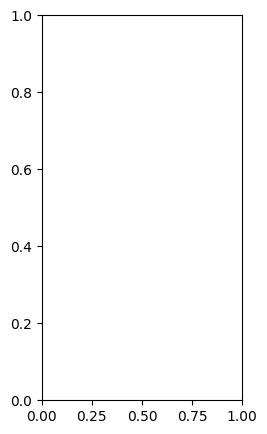

In [5]:
import matplotlib.pyplot as plt

def show_images(images, labels=None, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
       
        if len(images[i].shape) == 2:
            plt.imshow(images[i], cmap='gray')
        else:
          
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        if labels:
            plt.title(labels[i])
    plt.show()

# Exemple d'utilisation
show_images(X, y, n=5)  


In [ ]:

X = np.array(X).astype('float32') / 255.0
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  


le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Étiquettes disponibles :", list(le.classes_))

Étiquettes disponibles : [np.str_('Brahim'), np.str_('Khalid'), np.str_('Mohamed')]


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

NameError: name 'y_encoded' is not defined

NameError: name 'X_train' is not defined

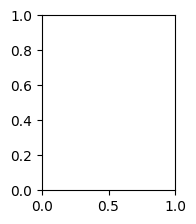

In [7]:
# Visualisation de quelques exemples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(le.inverse_transform([y_train[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 🤖 Entraînement d'un modèle CNN pour la reconnaissance faciale

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import joblib
import os

## 📥 Chargement des données préparées

In [ ]:
# Encodage one-hot des labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

## 🧠 Construction du modèle CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Utilisateur\Desktop\Projet_Ai\Pojet de AI\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,760,323 (33.42 MB)

 Trainable params: 8,760,323 (33.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


## 🚀 Entraînement du modèle

In [ ]:

history = model.fit(X_train, y_train_cat, epochs=30, validation_data=(X_test, y_test_cat))

Epoch 1/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 190s 629ms/step - accuracy: 0.6248 - loss: 0.7605 - val_accuracy: 0.9739 - val_loss: 0.0855
Epoch 2/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 150s 513ms/step - accuracy: 0.9570 - loss: 0.1293 - val_accuracy: 0.9859 - val_loss: 0.0431
Epoch 3/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 147s 501ms/step - accuracy: 0.9815 - loss: 0.0552 - val_accuracy: 0.9893 - val_loss: 0.0342
Epoch 4/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 146s 497ms/step - accuracy: 0.9869 - loss: 0.0449 - val_accuracy: 0.9944 - val_loss: 0.0189
Epoch 5/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 146s 497ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9940 - val_loss: 0.0175
Epoch 6/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 151s 514ms/step - accuracy: 0.9905 - loss: 0.0306 - val_accuracy: 0.9949 - val_loss: 0.0126
Epoch 7/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 145s 494ms/step - accuracy: 0.9839 - loss: 0.0434 - val_accuracy: 0.9953 - val_loss: 0.0159
Epoch 8/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 145s 494ms/step - accuracy: 0.9959 -

In [ ]:
model.save("model_faces.h5")
joblib.dump(le, "label_encoder.pkl")
print("Modèle et encodeur sauvegardés.")

Modèle et encodeur sauvegardés.


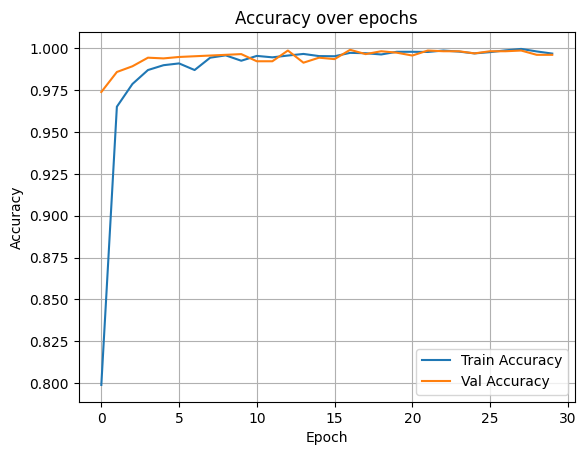

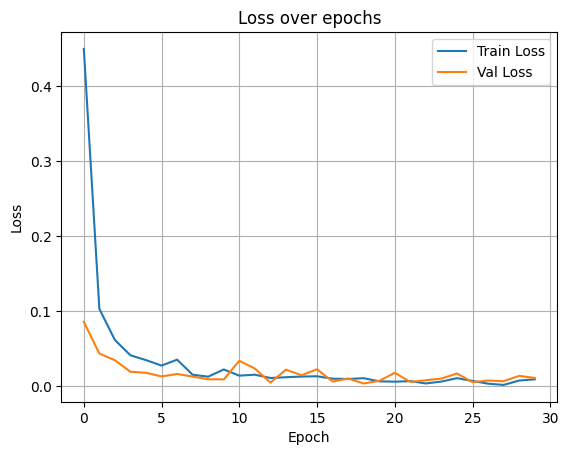

In [ ]:
import matplotlib.pyplot as plt

# 📈 Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 📉 Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test accuracy: {accuracy * 100:.2f}%")


74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 191ms/step - accuracy: 0.9977 - loss: 0.0071
Test accuracy: 99.62%


74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step
              precision    recall  f1-score   support

      Brahim       1.00      0.99      1.00       785
      Khalid       0.99      1.00      1.00       787
     Mohamed       1.00      0.99      1.00       767

    accuracy                           1.00      2339
   macro avg       1.00      1.00      1.00      2339
weighted avg       1.00      1.00      1.00      2339



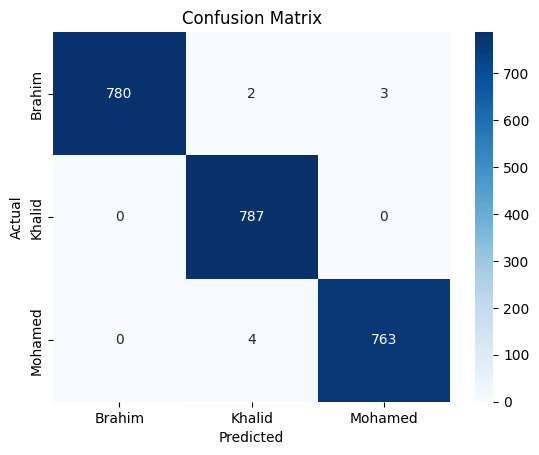

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 🔮 Prédictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# 🧾 Rapport
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))

# 🔲 Matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# 🎥 Reconnaissance faciale en temps réel avec webcam
Ce notebook capture la vidéo en direct, détecte les visages, puis prédit l'identité (Mohamed, Khalid, Brahim) avec le modèle CNN entraîné.

In [ ]:
# Import des librairies
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib


In [ ]:
# Chargement du modèle et de l'encodeur
model = load_model('model_faces.h5')
le = joblib.load('label_encoder.pkl')


In [ ]:
# Chargement du classificateur Haar Cascade pour détection de visage
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
# Fonction de prétraitement d'une image de visage avant prédiction
def preprocess_face(face_img):
    face_gray = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
    face_resized = cv2.resize(face_gray, (200, 200))
    face_normalized = face_resized / 255.0
    face_reshaped = np.reshape(face_normalized, (1, 200, 200, 1))
    return face_reshaped

In [ ]:
# Démarrage de la capture webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur de lecture webcam")
        break

    faces = face_cascade.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)
    for (x, y, w, h) in faces:
        face_img = frame[y:y+h, x:x+w]
        processed_face = preprocess_face(face_img)

        prediction = model.predict(processed_face)
        class_index = np.argmax(prediction)
        confidence = np.max(prediction)
        name = le.inverse_transform([class_index])[0]

        # Affichage rectangle + nom + confiance
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        text = f"{name} ({confidence*100:.1f}%)"
        cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    cv2.imshow('Reconnaissance Faciale', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━